In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# 离散型随机变量 
 - PMF概率质量函数  Probability Mass Function
 - 在stats库中离散型随机变量都继承**rv_discrete**类

In [27]:

# 设有一个不均匀的骰子，各点出现的几率不相等
x = range(1,7)
p = (0.4,0.2,0.1,0.1,0.1,0.1)   # PMF
dice = stats.rv_discrete(values = (x,p))
rv = dice.rvs(size=20) # rvs()方法是根据定义的PMF，产生随机数，size是产生随机数的数量
print('the random numbers are :',rv)
rv_mean = dice.mean()
rv_var = dice.var()
rv_std = dice.std()
rv_expect = dice.expect() 
rv_entropy = dice.entropy()
print('the mean of the distribution is:',rv_mean)
print('the Variance of the distribution is:',rv_var)
print('the standard deviation of the distribution is:',rv_std)
print('the except of the distribution is:',rv_expect)
print('the differential entropy of the distribution is:',rv_entropy) #  离散型变量叫熵，连续性叫微分熵

the random numbers are : [5 1 2 2 2 4 6 1 4 6 1 1 2 1 5 5 2 2 1 1]
the mean of the distribution is: 2.6
the Variance of the distribution is: 3.04
the standard deviation of the distribution is: 1.74355957742
the except of the distribution is: 2.6
the differential entropy of the distribution is: 1.6094379124341


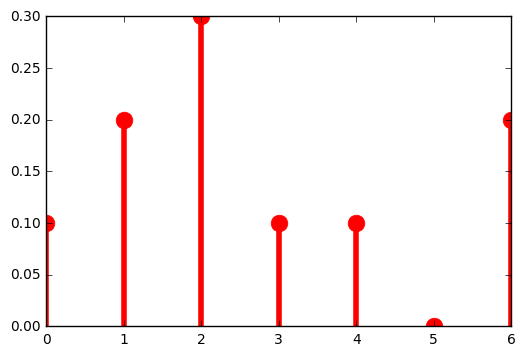

In [28]:
# 自定义概率分布
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name='custm', values=(xk, pk))
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk,0, custm.pmf(xk), colors='r', lw=4)   # vlines(x,ymin,ymax) hlines(y,xmin,xmax)
plt.show()

# 连续性随机变量
 -  PDF 概率密度函数
 -  CDF 累计分布函数  
 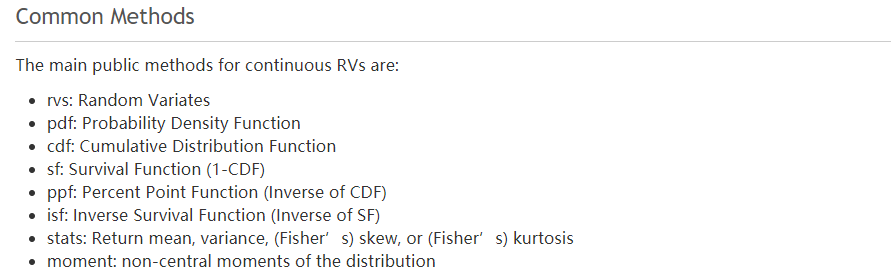

In [38]:
# 以标准正态分布函数为例   rv~norm（0,1）
from scipy.stats import norm,uniform

In [35]:
print(norm.cdf(0))
print(norm.cdf([-np.inf,-1,0,1,np.inf])) # 计算累计分布函数
print(norm.ppf(0.5))  # ppf是cdf的反函数，这里即当cdf为0.5时，x的位置

0.5
[ 0.          0.15865525  0.5         0.84134475  1.        ]
0.0


In [34]:
norm.mean(), norm.std(), norm.var()

(0.0, 1.0, 1.0)

In [36]:
norm.rvs(size=5, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

In [41]:
#  一般正态分布
print(norm.stats(loc = 3, scale = 4, moments='mv'))  # loc 设置均值，scale设置标准差，mv返回1,2阶非中心矩，即均值和方差,sk返回偏度和峰度
print(uniform.cdf([0,1,2,3,4,5,6],loc=1,scale=4)) # [1，5]区间上的均匀分布 ,计算各个区间的CDF

(array(3.0), array(16.0))
[ 0.    0.    0.25  0.5   0.75  1.    1.  ]


# 拟合分布
 - 分布参数极大似然估计

In [42]:
# 自定义连续性随机变量,集成stats.rv_continuous
class deterministic_gen(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x<0,0.,1.)
    def _stats(self):
        return 0.,0.,0.,0.

In [43]:
deterministic = deterministic_gen(name='deterministic')
deterministic.cdf(np.arange(-3,3,0.5))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.])

In [45]:
deterministic.pdf(np.arange(-3,3,0.5))  #自动根据cdf计算出pdf

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         5.83333333e+04,   4.16333634e-12,   4.16333634e-12,
         4.16333634e-12,   4.16333634e-12,   4.16333634e-12])